In [1]:
from src.Agents import Agent, Vegetation, Tree, Water
from src.Environment import Environment

import matplotlib.pyplot as plt
import numpy as np

# Loading a simple environment

An environment needs two things, an environment file which is just a two-dimensional numpy array, and a configuration file which holds all the parameter values for the simulation. We define both paths of these below and then can load an environment.

In [2]:
env_path = "local/environments/grass_env.npy"
config_path = "config/config.ini"
E = Environment(env_path, config_path)

# Simple simulation

With an environment, you can now run simulations. We will show a simple worfklow here.

### Display environment

Note there is a difference between `E.display()` and `E.display_state()`. The former is the __initial__ state of the environment as provided in the `env_path` file, whereas the latter is the __current__ state, in the case you have started a fire in the environment.

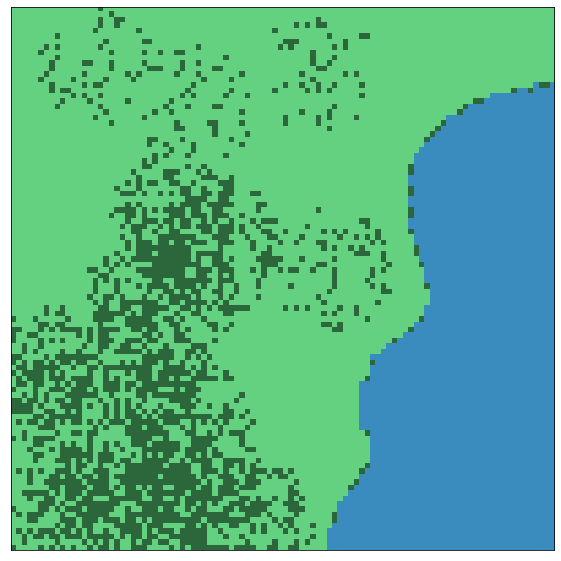

In [4]:
# Display initial environment
E.display()

### See topological and fuel properties of environment

The environment has both topology factors, and fuel properties. You can display them both as so. Recall again each agents fuel is assumed to follow a distribution given in the configuration parameters. Hence if we were to reset our environment, its initial fuel would look slightly different. 

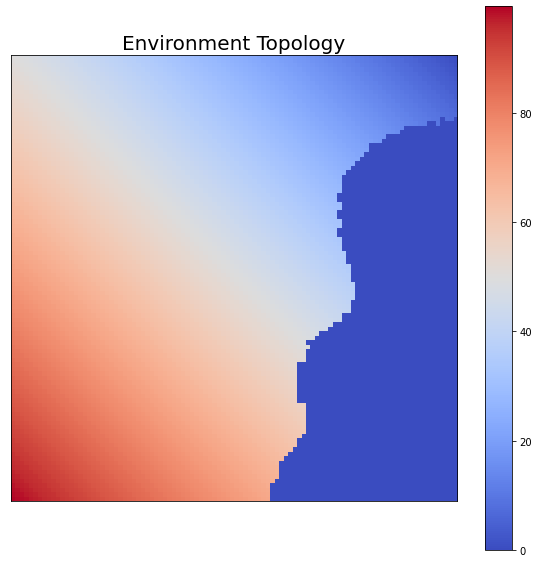

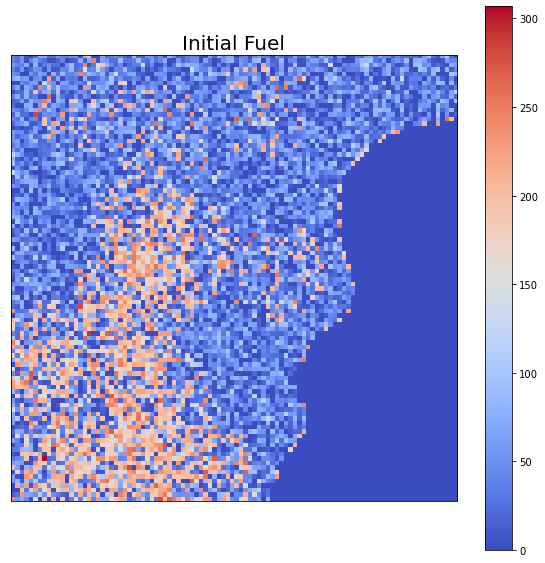

In [5]:
# Show topology
E.display_topology()
E.display_fuel()

### Set wind and start initial fire locations

We can set both a static wind direction, and start a fire on any cells, even such as water or dirt, however it would simply burn out if that occured. You can see this below.

In [7]:
# Set strong wind to upper left corner
E.set_wind(-10,10)

# Set fire to specific cells
for i in range(45,56):
    for j in range(20,23):
        E.start_fire(i,j)

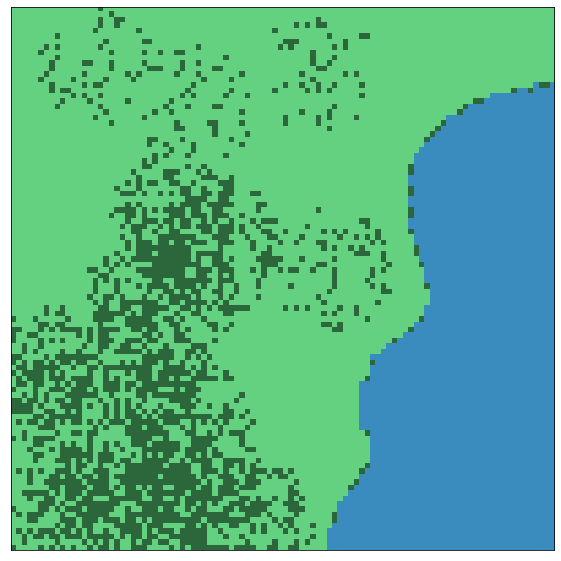

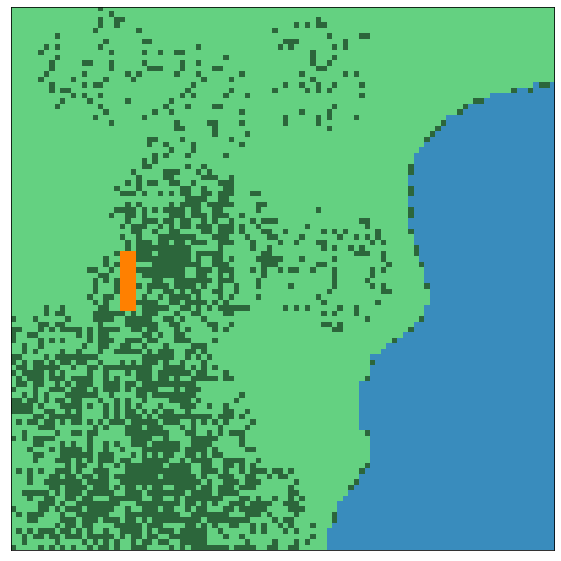

In [8]:
# Now look at how our environment hasn't changed, but its state has
E.display()
E.display_state()

### Simulate forward

We have two methods for simulation, simple and stochastic. The simple method means that if a cell is to catch fire, it catches its neighbors on fire the next time step. The stochastic method is more complicated and takes into account fuel levels, topology, wind, and is obviously random. We will first show the simple method. Notice there are three arguments: `N=25` means we simulate for 25 time steps, `disp=False` means we do not want to plot every time step, `verbose=True` means that it will return two vectors of the amount of available fuel and burned fuel at every time step.

In [9]:
# Start simple method
available_fuel, burned_fuel = E.simple_step(N=25, disp=False, verbose=True)

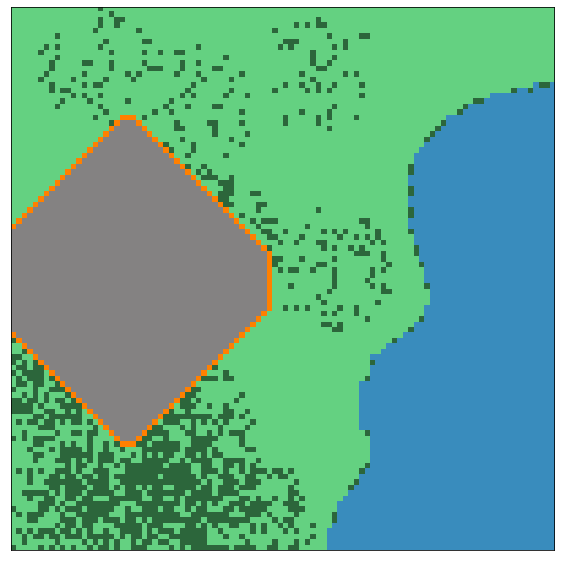

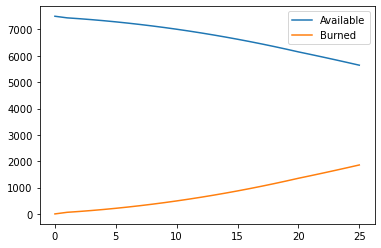

In [11]:
# Display state after simple fire
E.display_state()

# Display fuel burn rates
plt.plot(available_fuel, label="Available")
plt.plot(burned_fuel, label="Burned")
plt.legend()
plt.show()

We see that with the simplistic fire spreading scheme, it creates a very unrealistic shape, and it also totally ignored our wind parameters! That being said, the rate of which fuel is burned seems to be starting to exponetially increase which mimics real-world behavior. Lets use our more complicated method now.

### Running the advanced simulation

Before we run our advanced simulation, we have to __reset__ our environment, as there are many cells that have now caught fire. To do this, we simply have the `E.reset_env()` method. Recall again that when we reset our environment, we will be reassigning fuel weights for each agent according to its own distribution.

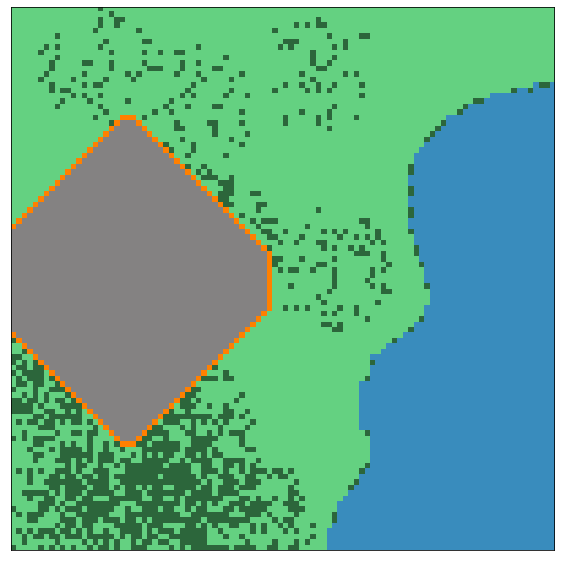

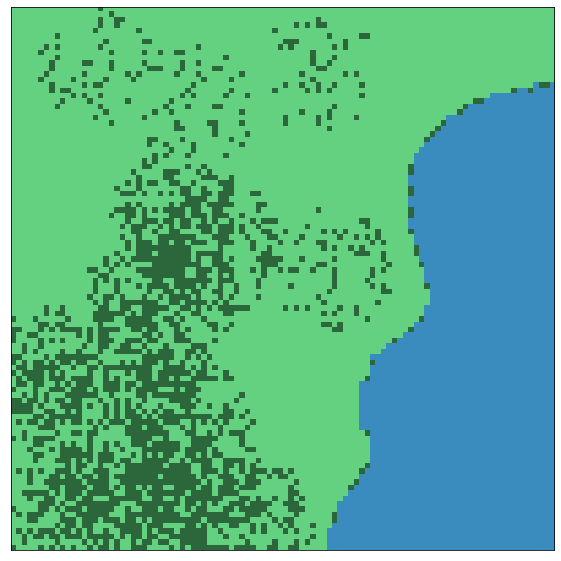

In [12]:
# Show current burned environment
E.display_state()

# Reset environment
E.reset_env()

# Show current state of environment, all fresh and clean
E.display_state()

### Run the advanced simulation

Now we simply start a fire in the same locations as last time, and now we can run our more advanced simulation forward. The arguments for the `E.step()` function are the same as the simple simulation, with just different fire transfer logic. Hence `N` gives the time steps forward to simulate, `disp` is a boolean on if we wish to plot every step, and `verbose` will again return the vectors of available and burnt fuel through the simulation.

In [13]:
# Set fire to specific cells
for i in range(45,56):
    for j in range(20,23):
        E.start_fire(i,j)
        
available_fuel2, burned_fuel2 = E.step(N=25, disp=False, verbose=True)

### Look at results

Now we can see that with the fire starting on mainly grass and with such an aggresive wind, the fire shape looks much different. You also may think that with the wind pushing to the upper left corner, why the fire didn't spread there. The reason is likely because looking at the topology map, there is an aggresive slop going downhill from bottom left to upper right. Hence the fire was not able to travel downhill, despite the wind pushing it that way.

We can also compare the rates of fuel between the two simulations, as seen in the comparison line plot.

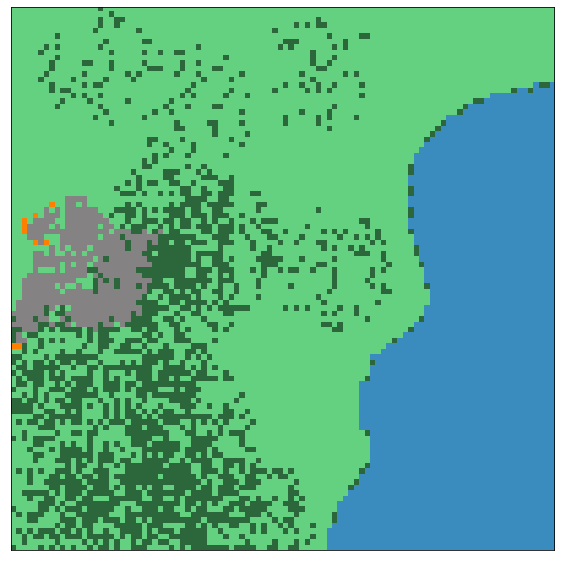

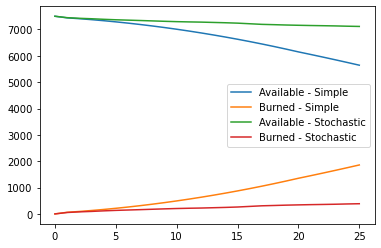

In [16]:
# Display fire area
E.display_state()

# Compare burned areas
# Display fuel burn rates
plt.plot(available_fuel, label="Available - Simple")
plt.plot(burned_fuel, label="Burned - Simple")
plt.plot(available_fuel2, label="Available - Stochastic")
plt.plot(burned_fuel2, label="Burned - Stochastic")
plt.legend()
plt.show()

### More advanced uses

Lets see you want to not only run a simulation, but get a mask of the current burned area? This is simple with the `get_mask()` method. This will simply return a binary mask of the burned area at the current time step it is called.  

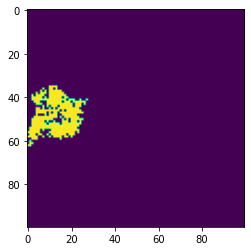

In [17]:
# Get mask
M = E.get_mask()

# Display
plt.imshow(M)
plt.show()

### Creating animations

One of the most fun things about creating wildfire simulations are seeing the videos. Not only can you get plots of every step in the simulation by using `E.step(disp=True)`, but you can also leverage the `create_animation()` method to build gifs of the entire simulation as well. Lets create and save a gif of our complex simulation again.

This method takes the parameters of `fname` which is the name of the resulting gif, `N` which is the time steps to move forward, and `complex_` as a boolean which is the ability to use either the stochastic (True) or deterministic simple (False) simulation.

In [19]:
# Reset environment
E.reset_env()

# Set fire to specific cells
for i in range(45,56):
    for j in range(20,23):
        E.start_fire(i,j)
        
# Simulate forward
E.create_animation(fname='output.gif', N=50, complex_=True)

If you check in the code directory of `local/gifs/` there will be a gif titled `output.gif` in the desired location! Note that as gifs can be quite large, all gifs are not tracked in github.

### Changing configuration files

The configuration files hold all relative parameters for both the aesthetic coloring of images and plots, as well as parameters for the stochastic simulation model. While the meanings of these are described in my project writeup, we can load two environments with different configurations, and compare them against each other. We will do that here, and change both one aesthetic parameter, and one model parameter.

### Monte Carlo Experiments

### Creating an environment

### Adding another agent to the simulation

# Open Questions

These are some interesting questions (listed in order of difficulty) that I think would be interesting to look into further.

In [ ]:
1. 